# AMR Slides plots 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_two_columns(df, colname):
    col1 = colname + '_beam'
    col2 = colname + '_asim'
    df_plot = df[[col1, col2]]
    ax = df_plot.plot.hist(bins=50, alpha=0.5)

In [7]:
hdf_uab = pd.HDFStore('output/pipeline.h5')
c = hdf_uab['/checkpoints']
hdf_uab.close()
# hdf_uab.close()

In [8]:
c

,checkpoint_name,land_use,timestamp,accessibility,person_windows,households,persons,school_destination_size,workplace_destination_size
0,init,init,2021-05-11 20:11:15.769298,,,,,,
1,initialize_landuse,initialize_landuse,2021-05-11 20:11:16.416345,initialize_landuse,,,,,
2,compute_accessibility,initialize_landuse,2021-05-11 20:11:18.581004,compute_accessibility,,,,,
3,initialize_households,initialize_landuse,2021-05-11 20:12:58.916310,compute_accessibility,initialize_households,initialize_households,initialize_households,initialize_households,initialize_households


# Loading data 

In [3]:
# # MTC data 
hdf_mtc = pd.HDFStore('../01_aa/output/pipeline.h5')
hh_mtc = hdf_mtc['/households/trip_mode_choice']
acc_mtc = hdf_mtc['/accessibility/trip_mode_choice']
lu_mtc = hdf_mtc['/land_use/trip_mode_choice']
trips_mtc = hdf_mtc['/trips/trip_mode_choice']
hdf_mtc.close()

# UrbanSim/ActivitySim/Beam Integration 

hdf_uab = pd.HDFStore('output/pipeline.h5')
hh_uab = hdf_uab['/households/trip_mode_choice']
acc_uab = hdf_uab['/accessibility/trip_mode_choice']
lu_uab = hdf_uab['/land_use/trip_mode_choice']
trips_uab = hdf_uab['/trips/trip_mode_choice']
hdf_uab.close()

In [4]:
acc_diffs = acc_mtc - acc_uab 
col_names = acc_diffs.columns

In [5]:
col_names

Index(['auPkRetail', 'auPkTotal', 'auOpRetail', 'auOpTotal', 'trPkRetail',
       'trPkTotal', 'trOpRetail', 'trOpTotal', 'nmRetail', 'nmTotal'],
      dtype='object')

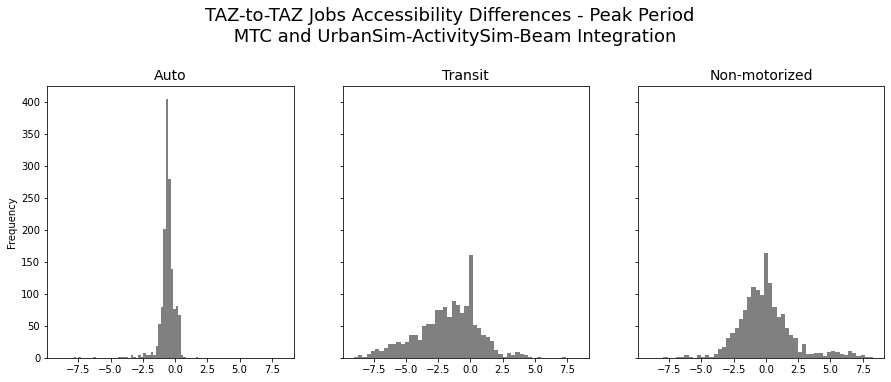

In [6]:
nrows, ncols = 1, 3
fig, axs = plt.subplots(nrows, ncols, figsize = (15,5), sharex = True, sharey = True)
acc_diffs['auPkTotal'].plot.hist(bins = 50, ax = axs[0], color = 'gray')
axs[0].set_title('Auto', fontsize = 14)
acc_diffs['trPkTotal'].plot.hist(bins = 50, ax = axs[1], color = 'gray')
axs[1].set_title('Transit', fontsize = 14)
acc_diffs['nmTotal'].plot.hist(bins = 50, ax = axs[2], color = 'gray')
axs[2].set_title('Non-motorized', fontsize = 14)

fig.suptitle('TAZ-to-TAZ Jobs Accessibility Differences - Peak Period \n MTC and UrbanSim-ActivitySim-Beam Integration', 
             fontsize = 18, y = 1.1);
fig.savefig('accs_differences.jpeg')

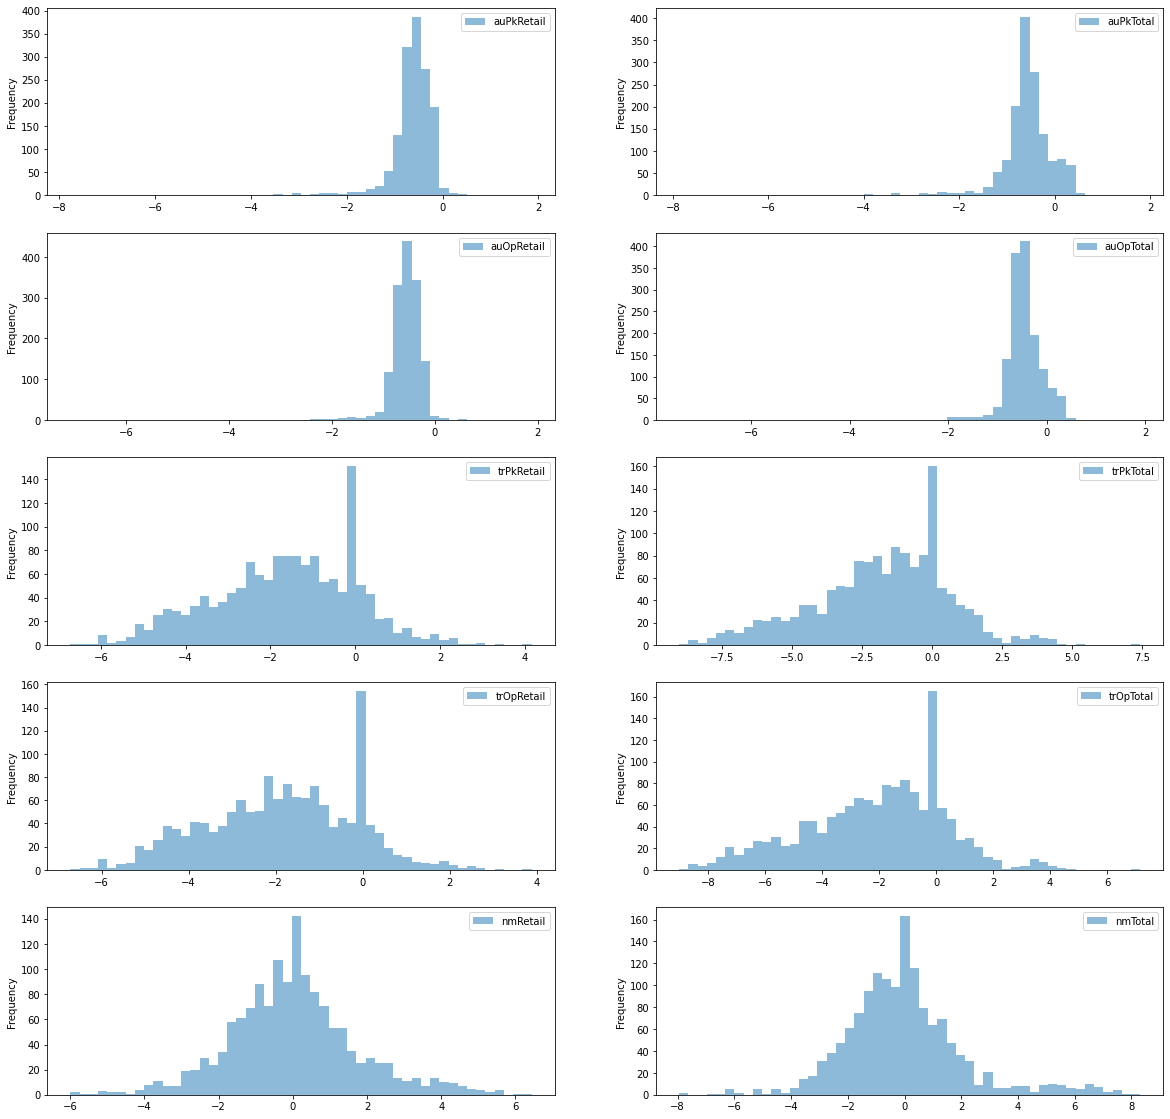

In [7]:
nrows, ncols = 5, 2
fig, axs = plt.subplots(nrows, ncols, figsize = (20,20) )

counter = 0
for i in range(nrows):
    for j in range(ncols):

#         col1 = acc4.columns[counter] + '_beam'
#         col2 = acc4.columns[counter] + '_asim'
        col_name = col_names[counter]
        col = acc_diffs[col_name]
        col.plot.hist(bins=50, alpha=0.5, ax = axs[i,j], label = col_name, legend = True)
        counter += 1

In [24]:
def plot_acc(mtc_geo, beam_geo, var_name, title_name):
    nrows, ncols = 1 , 1
    min_value = min(mtc_geo[var_name].min(), beam_geo[var_name].min())
    max_value = max(mtc_geo[var_name].max(), beam_geo[var_name].max())

    fig, axs = plt.subplots(nrows, ncols, figsize = (10,8), sharex=True, sharey=True,)
    # divider = make_axes_locatable(axs[0])
    # cax = divider.append_axes("right", size="5%", pad=0.1)
#     mtc_geo.plot(column = var_name, legend = True, ax = axs[0],  vmin=min_value, vmax = max_value, )
#     axs[0].set_title('Jobs MTC-based accessibilites\n' + title_name, fontsize=14, fontweight='bold')
#     axs[0].get_xaxis().set_visible(False)
#     axs[0].get_yaxis().set_visible(False)
# frame1.axes.get_yaxis().set_visible(False)

    # divider = make_axes_locatable(axs[1])
    # cax = divider.append_axes("right", size="5%", pad=0.1)
    beam_geo.plot(column = var_name, legend = True, ax = axs,  vmin=min_value, vmax = max_value)
    axs.set_title('Jobs UrbanSim-ActivitySim-BEAM-based accessibilites\n' + title_name, fontsize=14, fontweight='bold')
    axs.get_xaxis().set_visible(False)
    axs.get_yaxis().set_visible(False);
    return fig

In [25]:
geo_ba = gpd.read_file('Transportation_Analysis_Zones.shp')
mtc_geo = geo_ba.merge(acc_mtc, right_index =True, left_on = 'taz1454')
beam_geo = geo_ba.merge(acc_uab, right_index =True, left_on = 'taz1454')

# accs_names = [ 'auPkRetail', 'auPkTotal', 'auOpRetail','auOpTotal',
#                'trPkRetail', 'trPkTotal', 'trOpRetail', 'trOpTotal',
#                'nmRetail', 'nmTotal']

accs_names = [ 'trPkTotal']

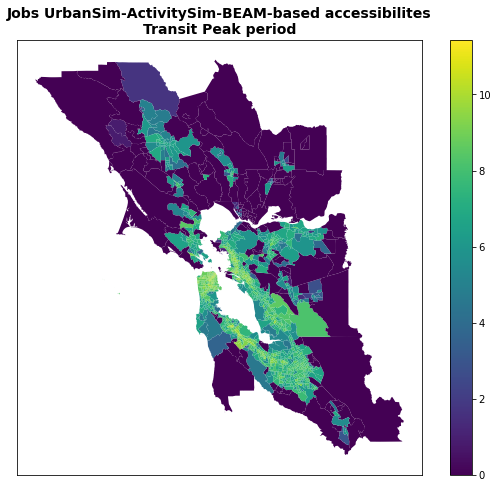

In [26]:
for var_name in accs_names:
    ax = plot_acc(mtc_geo, beam_geo, var_name, 'Transit Peak period' )

In [27]:
ax.savefig('transit_accessibilities.jpeg')

## Mode Shares

In [59]:
modes_ = {'SHARED2FREE':'PRIVATE', 'SHARED2PAY':'PRIVATE', 'SHARED3FREE':'PRIVATE', 
          'DRIVEALONEFREE':'PRIVATE','DRIVEALONEPAY':'PRIVATE', 'WALK':'NON-MOTORIZED', 
          'WALK_LOC':'TRANSIT', 'SHARED3PAY':'PRIVATE',  'TAXI':'TAXI/TNC',
          'TNC_SHARED':'TAXI/TNC', 'TNC_SINGLE':'TAXI/TNC', 'WALK_LRF':'TRANSIT', 
          'WALK_HVY':'TRANSIT', 'WALK_EXP':'TRANSIT','BIKE':'NON-MOTORIZED', 
          'DRIVE_LOC':'TRANSIT', 'DRIVE_LRF':'TRANSIT', 'WALK_COM':'TRANSIT', 
          'DRIVE_HVY':'TRANSIT', 'DRIVE_COM':'TRANSIT', 'DRIVE_EXP':'TRANSIT'}

In [60]:
trips_uab['mode_'] = trips_uab.trip_mode.replace(modes_)
trips_mtc['mode_'] = trips_mtc.trip_mode.replace(modes_)

In [82]:
def mode_shares_day(trips):
    counts = trips.groupby(['depart','mode_']).agg({'household_id':'count'})
    pcts = counts.groupby(level=0).apply(lambda x:x / x.sum()).reset_index()
    pcts = pcts.pivot(index = 'depart', columns = 'mode_', values = 'household_id')
    pcts.columns.name = 'Mode'
    return pcts

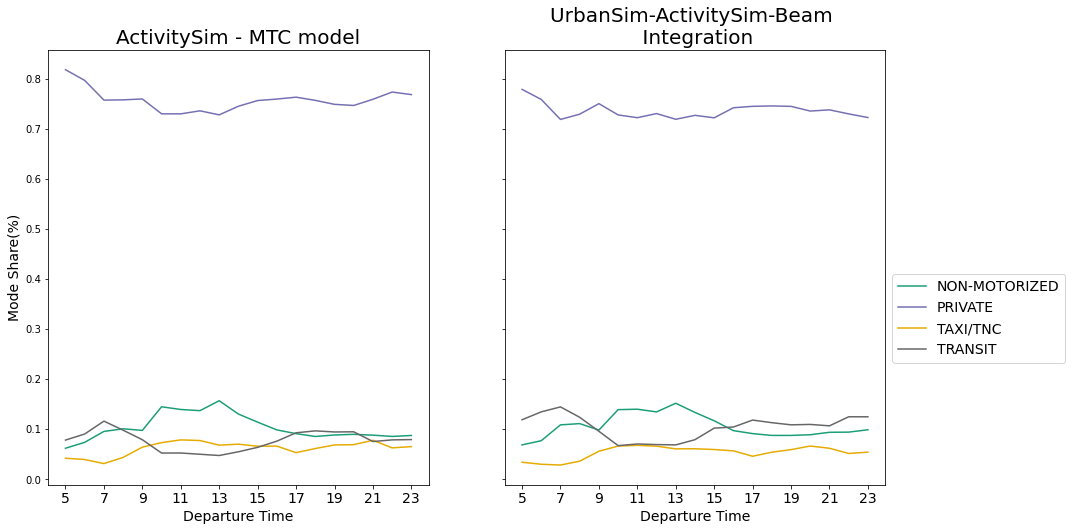

In [167]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (15,8))
# MTC
mode_shares_day(trips_mtc).plot(ax = ax1, title ='ActivitySim - MTC model',
                                xlabel = 'Departure Time', 
                                ylabel = 'Share(%)',
                                legend = False,
                                xticks = range(5,25,2), 
                                colormap = 'Dark2')

ax1.set_title('ActivitySim - MTC model', 
              fontdict={'fontsize':20})
ax1.set_xticklabels(range(5,25,2), fontsize = 14)
ax1.set_xlabel('Departure Time', fontsize = 14)
ax1.set_ylabel('Mode Share(%)', fontsize = 14)


#Integration
mode_shares_day(trips_uab).plot(ax = ax2, title ='UrbanSim-ActivitySim-Beam \n Integration',
                               xlabel = 'Departure Time', 
                                ylabel = 'Share(%)',
                                fontsize = 14,
                                xticks = range(5,25,2),
                               colormap = 'Dark2')

ax2.set_title('UrbanSim-ActivitySim-Beam \n Integration', 
              fontdict={'fontsize':20})

ax2.set_xticklabels(range(5,25,2),fontsize = 14)
ax2.set_xlabel('Departure Time', fontsize = 14)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5), fontsize = 14);

In [209]:
col_name = 'mode_'
# col_name = 'trip_mode'

In [210]:
uab_mode_share = trips_uab[col_name].value_counts()/len(trips_uab[col_name])
mtc_mode_share = trips_mtc[col_name].value_counts()/len(trips_mtc[col_name])

In [211]:
mode_share = pd.DataFrame(data = {'ActivitySim - MTC model':mtc_mode_share, 
                                  'UrbanSim-ActivitySim-Beam \n Integration':uab_mode_share})

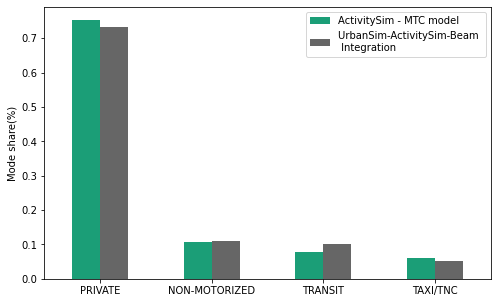

In [274]:
ax = mode_share.plot.bar(rot = 0,colormap = 'Dark2', figsize = (8,5));
plt.ylabel('Mode share(%)');
# plt.yscale('log')
# plt.xticks(rotation = 90)

In [276]:
fig = ax.get_figure()
fig.savefig('mode_share.jpeg')